In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue May 15 21:42:14 2018

@author: rodrigoazs
"""

import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [36]:
E = 10**(-6)

def tree(h):
#h = 9
    n = np.array([2**i for i in range(h+1)]).sum()

    edges = n - 1        
    pi_stacionary = ([3.0] * n) / (2*edges)

    n_only_1_edge = 2**h - 1
    pi_stacionary[0] = 2.0 / (2*edges)

    for i in range(n_only_1_edge, len(pi_stacionary)):
        pi_stacionary[i] = 1.0 / (2*edges)

    pi_stacionary = np.matrix(pi_stacionary, 'float64')
    P = np.zeros((n, n))
    for i in range(n):
        P[i][i] = 0.5
        left = 2*i + 1
        right = 2*i + 2
        parent = math.floor((i-1)/2)
        transitions = []
        if left < n:
            transitions.append(left)
            transitions.append(right)
        if parent >= 0:
            transitions.append(parent)
        for t in transitions:
            P[i][t] = 0.5 / len(transitions)

    P = np.matrix(P, 'float64')

    pi_estimate = [0] * n

    #X_arvore = []
    #y_arvore = []
    pi_0 = 0
    pi_estimate[0] = 1

    pi_estimate = np.matrix(pi_estimate, 'float64')
    for i in range(5000000):
        pi_estimate = pi_estimate * P
        variancia = (abs(pi_estimate - pi_stacionary)).sum()/2
        if variancia <= E:
            return i+2
    return i+2
            #X_arvore.append(i+2)
            #y_arvore.append(variancia)

In [37]:
def anel(n):

    #n = 1000

    edges = n       
    pi_stacionary = np.matrix(([2] * n), 'float64') / (2*edges)

    P = np.zeros((n, n))
    for i in range(n):
        P[i][i] = 0.5
        left = (i - 1) % n
        right = (i + 1) % n
        transitions = []
        transitions.append(left)
        transitions.append(right)
        for t in transitions:
            P[i][t] = 0.5 / len(transitions)

    P = np.matrix(P, 'float64')

    pi_estimate = [0.0] * n

    #X_anel = []
    #y_anel = []
    pi_estimate[0] = 1.0

    pi_estimate = np.matrix(pi_estimate, 'float64')
    for i in range(5000000):
        pi_estimate = pi_estimate * P
        variancia = (abs(pi_estimate - pi_stacionary)).sum()/2
        if variancia <= E:
            return i+2
        #X_anel.append(i+2)
        #y_anel.append(variancia)
    return i+2

In [63]:
def grid(g):
    #g = 32
    n = g**2

    edges = 2 * g * (g-1)      
    pi_stacionary = [0.0] * n #np.matrix(([4] * n)) / (2*edges)
    P = np.zeros((n, n))

    for i in range(n):
        transitions = []
        left = i - 1
        right = i + 1
        up = i - g
        down = i + g
        if left >= 0 and left%g < (g-1):
            transitions.append(left)
        if right >= 0 and right%g > 0:
            transitions.append(right)
        if up >= 0 and up < n:
            transitions.append(up)
        if down >= 0 and down < n:
            transitions.append(down)
        pi_stacionary[i] = len(transitions)
        P[i][i] = 0.5
        for t in transitions:
            P[i][t] = 0.5 / len(transitions)

    pi_stacionary = np.matrix(pi_stacionary, 'float64') / (2*edges)

    P = np.matrix(P, 'float64')

    pi_estimate = [0.0] * n

    #X_grid = []
    #y_grid = []
    pi_estimate[0] = 1.0

    pi_estimate = np.matrix(pi_estimate, 'float64')
    for i in range(5000000):
        pi_estimate = pi_estimate * P
        variancia = (abs(pi_estimate - pi_stacionary)).sum()/2
        if variancia <= E:
            return i+2
        #X_grid.append(i+2)
        #y_grid.append(variancia)
    return i+2

In [89]:
# for rings
n = [10,50,100,300,700,1000,3000,5000,10000]

# for trees
h = [2,5,6,7,8,9,10,11,12]

# for grids
g = [3,7,10,18,26,32,55,71,100]

In [40]:
#for trees
y_h = []
for i in h:
    t = tree(i)
    y_h.append(t)
    print(t)

21
113
149
185
219
251
281
308
333


In [47]:
#for rings
y_n = [135,3385,13539,121863,663483,1354048]
for i in range(6,len(n)):
    print('for i ' + str(n[i]))
    t = anel(n[i])
    y_n.append(t)
    print(t)

for i 3000
5000001
for i 5000


KeyboardInterrupt: 

In [64]:
#for grids
y_g = [58,432,944,3280,7027,10764,32445,54409]
for i in g:
    print('for i ' + str(i))
    t = grid(i)
    y_g.append(t)
    print(t)

for i 3
58
for i 7
432
for i 10
944
for i 18
3280
for i 26
7027
for i 32
10764
for i 55
32445
for i 71
54409
for i 100


KeyboardInterrupt: 

In [ ]:
plt.loglog(n, y_n, label='Anel')
plt.loglog(h, y_h, label='Árvore binária cheia')
plt.loglog(g, y_g, label='Grid 2D')
plt.legend()
plt.show()

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


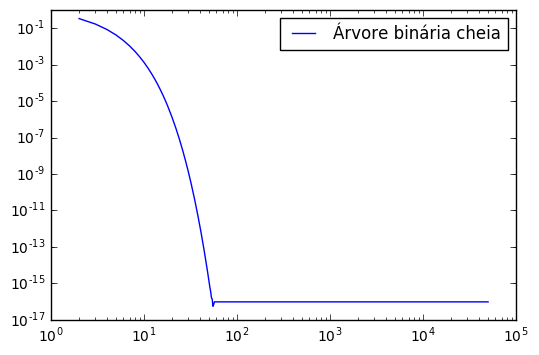

In [35]:
plots = []
for i in range(16):
    plots.append(int(10**i))
    plots.append(int(1/4 * 10**i))
    plots.append(int(2/4 * 10**i))
    plots.append(int(3/4 * 10**i))
    
h = 2
n = np.array([2**i for i in range(h+1)]).sum()

edges = n - 1        
pi_stacionary = ([3.0] * n) / (2*edges)

n_only_1_edge = 2**h - 1
pi_stacionary[0] = 2.0 / (2*edges)

for i in range(n_only_1_edge, len(pi_stacionary)):
    pi_stacionary[i] = 1.0 / (2*edges)

pi_stacionary = np.matrix(pi_stacionary, 'float64')
P = np.zeros((n, n))
for i in range(n):
    P[i][i] = 0.5
    left = 2*i + 1
    right = 2*i + 2
    parent = math.floor((i-1)/2)
    transitions = []
    if left < n:
        transitions.append(left)
        transitions.append(right)
    if parent >= 0:
        transitions.append(parent)
    for t in transitions:
        P[i][t] = 0.5 / len(transitions)

P = np.matrix(P, 'float64')

pi_estimate = [0] * n

X_arvore = []
y_arvore = []
pi_0 = 0
pi_estimate[0] = 1

pi_estimate = np.matrix(pi_estimate, 'float64')
for i in range(50000):
    pi_estimate = pi_estimate * P
    #if (i+2) in plots:
    variancia = (abs(pi_estimate - pi_stacionary)).sum()/2
    if variancia > 10**(-6):
        print(i+2)
    X_arvore.append(i+2)
    y_arvore.append(variancia)

plt.loglog(X_arvore, y_arvore, label='Árvore binária cheia')
plt.legend()
plt.show()

In [52]:
    g = 32
    n = g**2

    edges = 2 * g * (g-1)      
    pi_stacionary = [0.0] * n #np.matrix(([4] * n)) / (2*edges)
    P = np.zeros((n, n))

    for i in range(n):
        transitions = []
        left = i - 1
        right = i + 1
        up = i - g
        down = i + g
        if left >= 0 and left%g < (g-1):
            transitions.append(left)
        if right >= 0 and right%g > 0:
            transitions.append(right)
        if up >= 0 and up < n:
            transitions.append(up)
        if down >= 0 and down < n:
            transitions.append(down)
        pi_stacionary[i] = len(transitions)
        P[i][i] = 0.5
        for t in transitions:
            P[i][t] = 0.5 / len(transitions)

    pi_stacionary = np.matrix(pi_stacionary, 'float64') / (2*edges)

    P = np.matrix(P, 'float64')

In [54]:
P**1000

matrix([[0.0012276 , 0.00183785, 0.00182723, ..., 0.00015915, 0.00015649,
         0.00010373],
        [0.00122523, 0.00183433, 0.00182382, ..., 0.00015999, 0.00015736,
         0.00010432],
        [0.00121816, 0.00182382, 0.00181355, ..., 0.00016257, 0.00015999,
         0.0001061 ],
        ...,
        [0.0001061 , 0.00015999, 0.00016257, ..., 0.00181355, 0.00182382,
         0.00121816],
        [0.00010432, 0.00015736, 0.00015999, ..., 0.00182382, 0.00183433,
         0.00122523],
        [0.00010373, 0.00015649, 0.00015915, ..., 0.00182723, 0.00183785,
         0.0012276 ]])

In [65]:
    g = 100
    n = g**2

    edges = 2 * g * (g-1)      
    pi_stacionary = [0.0] * n #np.matrix(([4] * n)) / (2*edges)
    P = np.zeros((n, n))

    for i in range(n):
        transitions = []
        left = i - 1
        right = i + 1
        up = i - g
        down = i + g
        if left >= 0 and left%g < (g-1):
            transitions.append(left)
        if right >= 0 and right%g > 0:
            transitions.append(right)
        if up >= 0 and up < n:
            transitions.append(up)
        if down >= 0 and down < n:
            transitions.append(down)
        pi_stacionary[i] = len(transitions)
        P[i][i] = 0.5
        for t in transitions:
            P[i][t] = 0.5 / len(transitions)

    pi_stacionary = np.matrix(pi_stacionary, 'float64') / (2*edges)

    P = np.matrix(P, 'float64')

    pi_estimate = [0.0] * n

In [66]:
    pi_estimate[0] = 1.0

    pi_estimate = np.matrix(pi_estimate, 'float64')
    variancia = (abs(pi_estimate - pi_stacionary)).sum()/2

In [67]:
variancia

0.9999494949494945

In [73]:
A=P**10000000

In [74]:
A

matrix([[5.05050505e-05, 7.57575758e-05, 7.57575758e-05, ...,
         7.57575758e-05, 7.57575758e-05, 5.05050505e-05],
        [5.05050505e-05, 7.57575758e-05, 7.57575758e-05, ...,
         7.57575758e-05, 7.57575758e-05, 5.05050505e-05],
        [5.05050505e-05, 7.57575758e-05, 7.57575758e-05, ...,
         7.57575758e-05, 7.57575758e-05, 5.05050505e-05],
        ...,
        [5.05050505e-05, 7.57575758e-05, 7.57575758e-05, ...,
         7.57575758e-05, 7.57575758e-05, 5.05050505e-05],
        [5.05050505e-05, 7.57575758e-05, 7.57575758e-05, ...,
         7.57575758e-05, 7.57575758e-05, 5.05050505e-05],
        [5.05050505e-05, 7.57575758e-05, 7.57575758e-05, ...,
         7.57575758e-05, 7.57575758e-05, 5.05050505e-05]])

In [75]:
z = pi_estimate * A

In [76]:
variancia = (abs(z - pi_stacionary)).sum()/2

In [77]:
variancia

1.4995051868352564e-11

In [78]:
y_n

[135, 3385, 13539, 121863, 663483, 1354048, 5000001]

In [79]:
y_g

[58, 432, 944, 3280, 7027, 10764, 32445, 54409]

In [80]:
y_h

[21, 113, 149, 185, 219, 251, 281, 308, 333]

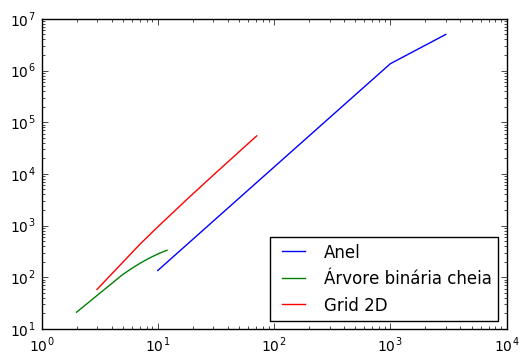

In [96]:
plt.loglog(n[:7], y_n, label='Anel')
plt.loglog(h, y_h, label='Árvore binária cheia')
plt.loglog(g[:8], y_g, label='Grid 2D')
plt.legend(loc=4)
plt.show()

In [90]:
n

[10, 50, 100, 300, 700, 1000, 3000, 5000, 10000]

In [1]:
def n_g(g):
    n = g**2
    return n

def n_h(h):
    n = np.array([2**i for i in range(h+1)]).sum()
    return n

In [3]:
y_a = [135, 3385, 13539, 121863, 663483, 1354048]
y_g = [58, 432, 944, 3280, 7027, 10764, 32445, 54409]
y_h = [21, 113, 149, 185, 219, 251, 281, 308, 333]

In [4]:
# for rings
a = [10,50,100,300,700,1000]

# for trees
h = [2,5,6,7,8,9,10,11,12]

# for grids
g = [3,7,10,18,26,32,55,71]

In [8]:
import numpy as np
x_a = [i for i in a]
x_h = [n_h(i) for i in h]
x_g = [n_g(i) for i in g]

In [11]:
x_a

[10, 50, 100, 300, 700, 1000]

In [12]:
x_h

[7, 63, 127, 255, 511, 1023, 2047, 4095, 8191]

In [13]:
x_g

[9, 49, 100, 324, 676, 1024, 3025, 5041]

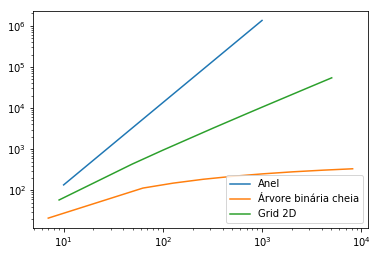

In [15]:
import matplotlib.pyplot as plt
plt.loglog(x_a, y_a, label='Anel')
plt.loglog(x_h, y_h, label='Árvore binária cheia')
plt.loglog(x_g, y_g, label='Grid 2D')
plt.legend(loc=4)
plt.show()